## Credit to the four notebooks this blend is created from:

* **[Input 1](http://www.kaggle.com/code/yusufsertkayaysk/ps-s5e12-lightgbm-xgboost-catboost)** - **[Yusuf Sertkaya](http://www.kaggle.com/yusufsertkayaysk)**
* **[Input 2](http://www.kaggle.com/code/nina2025/ps-s5e12-hb14g)** - **[F.A.Nina](http://www.kaggle.com/nina2025)**
* **[Input 3](http://www.kaggle.com/code/zhukovoleksiy/s5e12-exploring-fe-optuna-ensemble)** - **[Oleksii Zhukov](http://www.kaggle.com/zhukovoleksiy)**
* **[Input 4](http://www.kaggle.com/code/masayakawamata/s5e12-xgb-sample-weight)** - **[Masaya Kawamata](http://www.kaggle.com/masayakawamata)**
* **[Input 5](http://www.kaggle.com/code/jessewaite/s5e12-catboost-te-5fold-0-70191)** - **[Jesse Waite](http://www.kaggle.com/jessewaite)**



## Blend

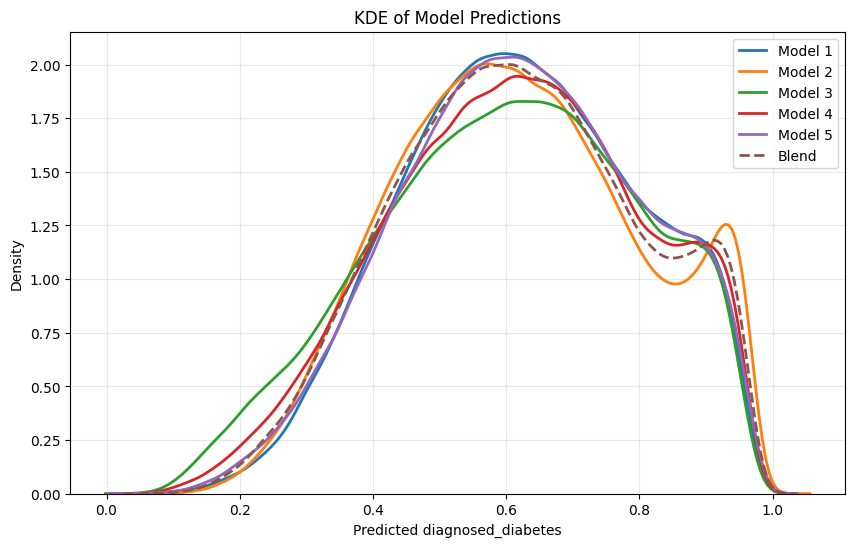

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


##input_1 -> Yusuf Sertkaya
##input_2 ->F.A.Nina
##input_3 -> Oleksii Zhukov
##input_4 -> Masaya Kawamata
##input_5 -> Jesse Waite


test = pd.read_csv("/kaggle/input/playground-series-s5e12/test.csv")

input1=pd.read_csv('/kaggle/input/ps-s5e12-lightgbm-xgboost-catboost/submission_optimized.csv')
input2=pd.read_csv('/kaggle/input/ps-s5e12-hb14g/submission.csv')
input3=pd.read_csv('/kaggle/input/s5e12-exploring-fe-optuna-ensemble/submission.csv')
input4=pd.read_csv('/kaggle/input/s5e12-xgb-sample-weight/submission.csv')
input5=pd.read_csv('/kaggle/input/s5e12-catboost-te-5fold-0-70191/submission.csv')

pred1 = input1['diagnosed_diabetes']
pred2 = input2['diagnosed_diabetes']
pred3 = input3['diagnosed_diabetes']
pred4 = input4['diagnosed_diabetes']
pred5 = input5['diagnosed_diabetes']

test_pred = 0.01 * pred1 + 0.48 * pred2 + 0.01 * pred3 + 0.25 * pred4 + 0.25* pred5

plt.figure(figsize=(10, 6))

sns.kdeplot(pred1, label = 'Model 1', linewidth = 2)
sns.kdeplot(pred2, label = 'Model 2', linewidth = 2)
sns.kdeplot(pred3, label = 'Model 3', linewidth = 2)
sns.kdeplot(pred4, label = 'Model 4', linewidth = 2)
sns.kdeplot(pred5, label = 'Model 5', linewidth = 2)
sns.kdeplot(test_pred, label = 'Blend', linewidth = 2, linestyle = 'dashed')

plt.title("KDE of Model Predictions")
plt.xlabel("Predicted diagnosed_diabetes")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)

plt.show()

submission = pd.DataFrame({
    "id": test['id'],
    "diagnosed_diabetes": test_pred
})
submission.to_csv("submission.csv", index=False)

* **The blend matches model 2 very closely, which makes sense since it's weighted the most heavily, but predicts values from 0 to 0.3 at a higher rate due to model 3**